# Introduction

# What is Data Wrangling?

# 1- Data Gathering

In [2]:
#To start the step of preprossing the dataset is neccessary to import some useful Python libraries.
import pandas as pd
import numpy as np
import requests 
import re
import json
import os 
import tweepy
from tweepy import OAuthHandler
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
twitter_archive = pd.read_csv(r'C:\Users\manar.albaqami\Desktop\Udacity\ProjectUdacity\project5\twitter-archive-enhanced.csv')
# view the first 3 rows in twitter_archive data
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    #reading tweet image predictions tsv file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
# view the first 3 rows in image_predictions data
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
data_tweet = pd.read_json(r'C:\Users\manar.albaqami\Desktop\Udacity\ProjectUdacity\project5\tweet-json.txt',lines=True)
# view the first 3 rows 
data_tweet.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


 # 2- Assessing Data

# What is Assessing Data?

# Step2: Assessing Data |  twitter_archive Dataset 

In [7]:
#useful method is info that shows a summary of the twitter_archive dataset, 
#like number of observations, columns, variable type and the total memory usage
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another magnificent photo. 12/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687480748...,12,10,None,None,None,None,None
702,786036967502913536,NaN,NaN,2016-10-12 02:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Scout. He really wants ...,7.798343e+17,4.196984e+09,2016-09-25 00:06:08 +0000,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,None,None,None,None
711,784517518371221505,NaN,NaN,2016-10-07 22:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,None,None,None,None


In [9]:
#show the statical information
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#find if there is any duplicated values
twitter_archive.duplicated().sum()

0

no any duplicated values

In [11]:
# cheek null value in all columns
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

# Step2: Assessing Data | image_predictions Dataset 

In [12]:
#useful method is info that shows a summary of the twitter_archive dataset, 
#like number of observations, columns, variable type and the total memory usage
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_predictions.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
927,702671118226825216,https://pbs.twimg.com/media/CcBjp2nWoAA8w-2.jpg,1,bloodhound,0.381227,True,Sussex_spaniel,0.212017,True,clumber,0.128622,True
903,700062718104104960,https://pbs.twimg.com/media/CbcfUxoUAAAlHGK.jpg,1,hummingbird,0.180998,False,peacock,0.135179,False,eel,0.075371,False
679,683742671509258241,https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg,1,Pembroke,0.895279,True,Cardigan,0.022385,True,cocker_spaniel,0.017045,True
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False


In [14]:
#show the statical information
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
#find if there is any duplicated values
image_predictions.duplicated().sum()

0

no any duplicated values

In [16]:
# cheek null value in all columns
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

no any missing values 

In [17]:
image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [18]:
image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [19]:
image_predictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

# Step2: Assessing Data |data_tweet Dataset 

In [20]:
#useful method is info that shows a summary of the twitter_archive dataset, 
#like number of observations, columns, variable type and the total memory usage
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [21]:
data_tweet.sample(4)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
446,2017-01-11 02:57:26+00:00,819015331746349057,819015331746349056,RT @dog_rates: This is Sunny. She was also a v...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 819006388206649344, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Wed Jan 11 02:21:57 +0000 2017...,NaN,NaN,NaN
1177,2016-04-11 03:33:34+00:00,719367763014393856,719367763014393856,Meet Sid &amp; Murphy. Murphy floats alongside...,False,"[0, 142]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 719367753803698176, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3022,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2284,2015-11-19 03:29:07+00:00,667182792070062081,667182792070062080,This is Timison. He just told an awful joke bu...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667182789016596480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,15075,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
666,2016-10-23 23:42:19+00:00,790337589677002753,790337589677002752,Meet Maggie. She can hear your cells divide. 1...,False,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 790337582504763392, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8740,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [22]:
# cheek null value in all columns
data_tweet.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [23]:
data_tweet['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

# Summary Assement all dataset  :

# 3- Cleaning Data

# What is Cleaning Data?


#  Step3: Cleaning Data | twitter_archive Dataset 

In [24]:
#Create a copy of twitter_archive dataframe

twitter_archive_copy = twitter_archive.copy()
twitter_archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


# Quality Issues:

# 1- Defin

# 2- Code

In [25]:
#tweet_id type is int64 ,i will chanage tweet_id data type to string
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

In [26]:
#convert timestamp data type to datetime and rename the column into tweet_date
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy['timestamp'])
twitter_archive_copy.rename(columns={"timestamp":'tweet_date'},inplace=True)

# 3-Test

In [27]:
print (twitter_archive_copy['tweet_id'].dtypes)
print (twitter_archive_copy['tweet_date'].dtypes)

object
datetime64[ns, UTC]


In [28]:
# test change timestamp columns to tweet_data
twitter_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


# 1- Defin

# 2- Code

In [29]:

drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator']
twitter_archive_copy.drop(drop_columns, axis=1,inplace = True)

# 3- Test

In [30]:
twitter_archive_copy.head(3)

,tweet_id,tweet_date,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None


# Tidiness Isuue

# 1- Defin

# 2- code

In [31]:
# Extract doggo, floofer, pupper and puppo columns into new 'stages_of_dogs' column 
twitter_archive_copy['stages_of_dogs'] = twitter_archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [32]:
# Drop doggo, floofer, pupper, and puppo columns
twitter_archive_copy= twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

# 3- Test

In [33]:
twitter_archive_copy['stages_of_dogs'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stages_of_dogs, dtype: int64

In [34]:
twitter_archive_copy.sample(4)

,tweet_id,tweet_date,text,name,stages_of_dogs
683,788412144018661376,2016-10-18 16:11:17+00:00,This is Dexter. He breaks hearts for a living....,Dexter,NaN
882,760290219849637889,2016-08-02 01:44:48+00:00,This is Rocco. He's doing his best. 13/10 some...,Rocco,NaN
773,776249906839351296,2016-09-15 02:42:54+00:00,RT @dog_rates: We only rate dogs. Pls stop sen...,very,NaN
420,822163064745328640,2017-01-19 19:25:24+00:00,RT @dog_rates: This is Mattie. She's extremely...,Mattie,NaN


# Step3: Cleaning Data | image_predictions dataset :

In [35]:
#Create a copy of image_predictions dataframe 
image_predictions_copy = image_predictions.copy()
image_predictions_copy.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


# Quality Issues:

# 1- Defin

# 2- Code

In [36]:
#tweet_id type is int64 ,i will chanage tweet_id data type to string
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype('str')

# 3- Test

In [37]:
# test 
print(image_predictions_copy['tweet_id'].dtype)

object


# 1-Defin

# 2- Code

In [38]:
#The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters.
image_predictions_copy['p1'] = image_predictions_copy['p1'].str.lower()

In [39]:
image_predictions_copy['p2'] = image_predictions_copy['p2'].str.lower()


In [40]:
image_predictions_copy['p3'] = image_predictions_copy['p3'].str.lower()

# 3- Test

In [41]:
image_predictions_copy['p1'].head()


0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [42]:
image_predictions_copy['p2'].head()

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            rottweiler
Name: p2, dtype: object

In [43]:
image_predictions_copy['p3'].head()

0      shetland_sheepdog
1    rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               doberman
Name: p3, dtype: object

# Tidiness Issues :

# 1- Defin

# 2- Code

In [44]:
#extract dog breed 
def extr_dog(r):
        is_bread = False
        conf_br = 0
        nama_br = ''
        if(r.p1_dog == True):
            if(r.p1_conf >= True):
                conf_br = r.p1_conf
                name_br = r.p1
                is_bread = True
        if(r.p2_dog == True):
            if(r.p2_conf >= conf_br):
                conf_br = r.p2_conf
                name_br =r.p2
                is_bread = True
        if(r.p3_dog == True):
            if(r.p3_conf >= conf_br):
                conf_br = r.p3_conf
                name_br =r.p3
                is_bread = True
        if is_bread == False:
            return np.nan
        else:
            return name_br
image_predictions_copy['breed'] = image_predictions_copy.apply(extr_dog,axis=1)
            
        

In [45]:
drop_columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
image_predictions_copy.drop(drop_columns, axis=1,inplace = True)

# 3-Test

In [46]:
image_predictions_copy.head(3)

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,collie
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,miniature_pinscher
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,malinois


In [47]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   int64 
 3   breed     1708 non-null   object
dtypes: int64(1), object(3)
memory usage: 65.0+ KB


# Step3: Cleaning Data | data_tweet dataset

In [48]:
 #Create a copy of data_tweet dataframe 
data_tweet_copy = data_tweet.copy()
data_tweet_copy.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Quality Issues:

# 1- Defin

# 2- Code

In [49]:
#ranme id _str columns to tweet_id
data_tweet_copy.rename(columns={'id_str':'tweet_id'},inplace=True)

# 3- Test

In [50]:
data_tweet_copy.head(3)

,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [51]:
data_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   tweet_id                       2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

# 1- Defin

# 2- Code

In [52]:
#change tweet_id data type from int to object
data_tweet_copy['tweet_id'] = data_tweet_copy['tweet_id'].astype('str')

In [53]:
#change  source data dtype to category
data_tweet_copy['source'] = data_tweet_copy['source'].astype('category')

# 3- Test

In [54]:
##test data dtype
print(data_tweet_copy['tweet_id'].dtype)
print(data_tweet_copy['source'].dtype)

object
category


In [55]:
data_tweet_copy.tweet_id.duplicated().sum()

0

# 1- Defin

# 2- Code

In [56]:
#Delete columns no needed
data_tweet_copy.drop(columns=['created_at','full_text','truncated','display_text_range','entities'
    ,'extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str'
     ,'in_reply_to_screen_name','user','geo','coordinates','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang'
    ,'retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','place','contributors','is_quote_status'],inplace=True)

# 3- Test

In [57]:
data_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              2354 non-null   int64   
 1   tweet_id        2354 non-null   object  
 2   source          2354 non-null   category
 3   retweet_count   2354 non-null   int64   
 4   favorite_count  2354 non-null   int64   
dtypes: category(1), int64(3), object(1)
memory usage: 76.2+ KB


In [58]:
data_tweet_copy.isnull().sum()

id                0
tweet_id          0
source            0
retweet_count     0
favorite_count    0
dtype: int64

In [59]:
data_tweet_copy.head()

,id,tweet_id,source,retweet_count,favorite_count
0,892420643555336193,892420643555336192,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467
1,892177421306343426,892177421306343424,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819
2,891815181378084864,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461
3,891689557279858688,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908
4,891327558926688256,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048


# 1- Defin

# 2- Code

In [60]:
data_tweet_copy['source'] = data_tweet_copy["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')                                                              

C:\Users\MANAR~1.ALB\AppData\Local\Temp/ipykernel_17304/3984106545.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_tweet_copy['source'] = data_tweet_copy["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


# 3- Test

In [61]:
data_tweet_copy['source'].value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [62]:
data_tweet_copy.head(2)

,id,tweet_id,source,retweet_count,favorite_count
0,892420643555336193,892420643555336192,Twitter for iPhone,8853,39467
1,892177421306343426,892177421306343424,Twitter for iPhone,6514,33819


# Greating data frame | merge all dataset

In [63]:
merge_df = pd.merge(twitter_archive_copy,data_tweet_copy , on='tweet_id' , how ='left')
merge_df.head(4)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,8.918152e+17,Twitter for iPhone,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,8.916896e+17,Twitter for iPhone,8964.0,42908.0


In [64]:
merge_df = pd.merge(merge_df,image_predictions_copy,on='tweet_id',how='left')
merge_df.head(4)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,8.918152e+17,Twitter for iPhone,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,8.916896e+17,Twitter for iPhone,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever


In [65]:
merge_df.breed.unique()

array([nan, 'pekinese', 'malamute', 'labrador_retriever',
       'english_springer', 'irish_terrier', 'border_collie', 'eskimo_dog',
       'irish_setter', 'cardigan', 'pomeranian', 'boxer', 'borzoi',
       'tibetan_mastiff', 'rhodesian_ridgeback', 'pug', 'redbone',
       'weimaraner', 'toy_terrier', 'great_pyrenees', 'chihuahua',
       'shih-tzu', 'siberian_husky', 'american_staffordshire_terrier',
       'norwich_terrier', 'french_bulldog', 'malinois',
       'miniature_pinscher', 'chesapeake_bay_retriever',
       'golden_retriever', 'afghan_hound', 'clumber', 'beagle', 'vizsla',
       'boston_bull', 'whippet', 'collie', 'welsh_springer_spaniel',
       'italian_greyhound', 'saint_bernard', 'pembroke',
       'staffordshire_bullterrier', 'miniature_poodle',
       'black-and-tan_coonhound', 'bloodhound', 'sussex_spaniel',
       'flat-coated_retriever', 'briard', 'appenzeller', 'kuvasz',
       'papillon', 'groenendael', 'airedale', 'cocker_spaniel',
       'bouvier_des_flandres

In [66]:
merge_df.stages_of_dogs.nunique()

4

In [67]:
merge_df.source.nunique()

4

In [68]:
#Create a copy 
merge_df_clean = merge_df.copy()

In [69]:
#Programmatic assessment 
merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2356 non-null   object             
 1   tweet_date      2356 non-null   datetime64[ns, UTC]
 2   text            2356 non-null   object             
 3   name            2356 non-null   object             
 4   stages_of_dogs  399 non-null    object             
 5   id              1518 non-null   float64            
 6   source          1518 non-null   object             
 7   retweet_count   1518 non-null   float64            
 8   favorite_count  1518 non-null   float64            
 9   jpg_url         2075 non-null   object             
 10  img_num         2075 non-null   float64            
 11  breed           1708 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 239.3+ KB


In [70]:
#cheack duplication
merge_df_clean.tweet_id.duplicated().sum()

0

In [71]:
merge_df_clean.head(3)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,8.918152e+17,Twitter for iPhone,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute


In [72]:
merge_df_clean.sample(5)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count,jpg_url,img_num,breed
283,838952994649550848,2017-03-07 03:22:35+00:00,SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,None,NaN,8.389530e+17,Twitter for iPhone,4505.0,21289.0,NaN,NaN,NaN
2061,671166507850801152,2015-11-30 03:18:59+00:00,This is Herm. It's his first day of potty trai...,Herm,NaN,6.711665e+17,Twitter for iPhone,390.0,931.0,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1.0,NaN
310,835309094223372289,2017-02-25 02:03:02+00:00,RT @dog_rates: So this just changed my life. 1...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,851953902622658560,2017-04-12 00:23:33+00:00,RT @dog_rates: This is Astrid. She's a guide d...,Astrid,doggo,8.519539e+17,Twitter for iPhone,10706.0,0.0,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1.0,american_staffordshire_terrier
952,751937170840121344,2016-07-10 00:32:46+00:00,This is Ruby. Her ice cube is melting. She doe...,Ruby,NaN,7.519372e+17,Twitter for iPhone,1530.0,5770.0,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1.0,golden_retriever


In [73]:
merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2356 non-null   object             
 1   tweet_date      2356 non-null   datetime64[ns, UTC]
 2   text            2356 non-null   object             
 3   name            2356 non-null   object             
 4   stages_of_dogs  399 non-null    object             
 5   id              1518 non-null   float64            
 6   source          1518 non-null   object             
 7   retweet_count   1518 non-null   float64            
 8   favorite_count  1518 non-null   float64            
 9   jpg_url         2075 non-null   object             
 10  img_num         2075 non-null   float64            
 11  breed           1708 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 239.3+ KB


# Insight and observasions:

In [74]:
merge_df_clean.head(5)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,8.918152e+17,Twitter for iPhone,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,8.916896e+17,Twitter for iPhone,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,8.913276e+17,Twitter for iPhone,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,english_springer


In [75]:
merge_df_clean.describe()

,id,retweet_count,favorite_count,img_num
count,1.518000e+03,1518.000000,1518.000000,2075.000000
mean,7.386500e+17,2971.322134,7752.137681,1.203855
std,6.699942e+16,4867.362390,10966.529752,0.561875
min,6.660293e+17,2.000000,0.000000,1.000000
25%,6.767853e+17,607.250000,1405.250000,1.000000
50%,7.145456e+17,1389.000000,3558.500000,1.000000
75%,7.904331e+17,3493.500000,9629.000000,1.000000
max,8.918152e+17,56625.000000,107015.000000,4.000000


In [76]:
merge_df_clean['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [77]:
merge_df_clean['stages_of_dogs'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stages_of_dogs, dtype: int64

# Storing data

In [78]:
merge_df_clean.to_csv('twitter_archive_master_.csv',index=False)

# Analyzing and Visualizing Data

<AxesSubplot:title={'center':'Sources of Tweet'}, xlabel='source', ylabel='count'>

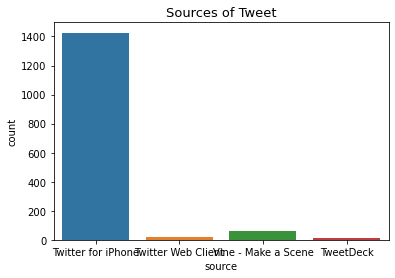

In [79]:
plt.title('Sources of Tweet', size=13)
sns.countplot(data=merge_df_clean, x='source')

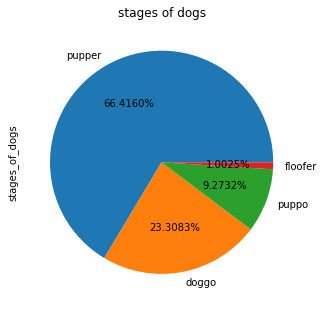

In [80]:
merge_df_clean.stages_of_dogs.value_counts().plot.pie(figsize=(5,6), autopct='%.4f%%')
plt.title('stages of dogs')
plt.show()

In [81]:
merge_df_clean['breed'].value_counts()[0:6].sort_values(ascending=False)

labrador_retriever    110
golden_retriever      103
cardigan               76
chihuahua              50
pomeranian             49
toy_poodle             45
Name: breed, dtype: int64

Text(0.5, 1.0, 'Top 6 frequent dog breed')

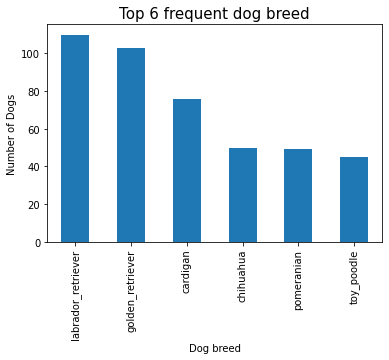

In [82]:
merge_df_clean['breed'].value_counts()[0:6].sort_values(ascending=False).plot(kind ='bar')
plt.xlabel('Dog breed')
plt.ylabel('Number of Dogs')
plt.title('Top 6 frequent dog breed', size=15)

C:\Users\manar.albaqami\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: 'Text' object has no property 'Fontsize'

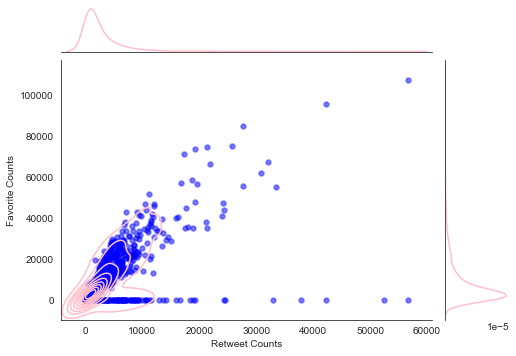

In [85]:
#Visualization
sns.set_style('white')
compare= sns.jointplot(data=merge_df_clean,x="retweet_count", y="favorite_count",kind="kde", color="pink", size=7)
compare.plot_joint(plt.scatter, marker=".",s=80,alpha=0.45, c="blue", linewidth=2)
compare.fig.subplots_adjust(top=0.7)
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.suptitle(' Compare between Retweet Counts Favorate Counts', Fontsize =11);

In [86]:
data= merge_df_clean['tweet_id'].groupby([merge_df['tweet_date'].dt.month, merge_df['tweet_date'].dt.year]).count()
data.head()

tweet_date  tweet_date
1           2016          194
            2017           94
2           2016          125
            2017           88
3           2016          137
Name: tweet_id, dtype: int64

Text(0, 0.5, 'Number of Tweets')

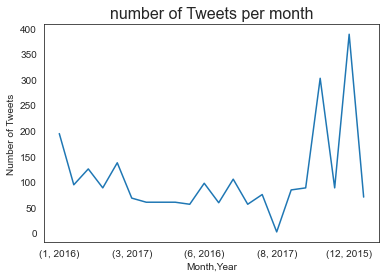

In [87]:
data.plot.line()
plt.title('number of Tweets per month', size=16)
plt.xlabel('Month,Year')
plt.ylabel('Number of Tweets')